In [1]:
from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import random
import pandas as pd
import sys
sys.path.append('../preprocessing')
from UAVidToolKit.colorTransformer import UAVidColorTransformer

In [2]:
total_df = pd.read_pickle('../pickles/uav_sfcn_val_origin.pickle')


In [3]:
slic_df = pd.read_pickle("../pickles/uav_slic_val_origin.pickle")

In [4]:
total_df

image_path                       id  \
0   ../data/uavid/uavid_val/seq20/Images/000900.png  Images_uavid_val_000900   
1   ../data/uavid/uavid_val/seq20/Images/000000.png  Images_uavid_val_000000   
2   ../data/uavid/uavid_val/seq20/Images/000200.png  Images_uavid_val_000200   
3   ../data/uavid/uavid_val/seq20/Images/000100.png  Images_uavid_val_000100   
4   ../data/uavid/uavid_val/seq20/Images/000500.png  Images_uavid_val_000500   
..                                              ...                      ...   
65  ../data/uavid/uavid_val/seq16/Images/000800.png  Images_uavid_val_000800   
66  ../data/uavid/uavid_val/seq16/Images/000300.png  Images_uavid_val_000300   
67  ../data/uavid/uavid_val/seq16/Images/000400.png  Images_uavid_val_000400   
68  ../data/uavid/uavid_val/seq16/Images/000600.png  Images_uavid_val_000600   
69  ../data/uavid/uavid_val/seq16/Images/000700.png  Images_uavid_val_000700   

                                   superpixel_segment  \
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
..                                                ...   
65  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
66  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
67  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
68  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
69  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                            gt_path  \
0   ../data/uavid/uavid_val/seq20/Labels/000900.png   
1   ../data/uavid/uavid_val/seq20/Labels/000000.png   
2   ../data/uavid/uavid_val/seq20/Labels/000200.png   
3   ../data/uavid/uavid_val/seq20/Labels/000100.png   
4   ../data/uavid/uavid_val/seq20/Labels/000500.png   
..                                              ...   
65  ../data/uavid/uavid_val/seq16/Labels/000800.png   
66  ../data/uavid/uavid_val/seq16/Labels/000300.png   
67  ../data/uavid/uavid_val/seq16/Labels/000400.png   
68  ../data/uavid/uavid_val/seq16/Labels/000600.png   
69  ../data/uavid/uavid_val/seq16/Labels/000700.png   

                                                    G  \
0   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
..                                                ...   
65  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
66  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
67  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
68  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
69  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                              feature  \
0   [[255.0, 255.0, 255.0, 0.0009238281, 0.0031407...   
1   [[219.9828, 207.9828, 207.9828, 0.0029317862, ...   
2   [[229.45352, 218.44507, 218.58028, 0.004226039...   
3   [[220.16147, 208.16147, 208.16147, 0.003797842...   
4   [[124.623795, 112.47588, 109.44051, 0.00531064...   
..                                                ...   
65  [[118.52147, 120.773, 126.96012, 0.006564737, ...   
66  [[76.91057, 88.21138, 81.69919, 0.003555852, 0...   
67  [[200.12778, 211.19167, 219.58888, 0.00580476,...   
68  [[162.7476, 169.23003, 168.31949, 0.004661708,...   
69  [[112.36156, 118.30206, 125.55606, 0.00499857,...   

                                                edges  \
0   [[0, 1], [0, 259], [0, 0], [1, 2], [1, 259], [...   
1   [[0, 1], [0, 261], [0, 0], [1, 2], [1, 261], [...   
2   [[0, 1], [0, 247], [0, 0], [1, 2], [1, 247], [...   
3   [[0, 1], [0, 257], [0, 0], [1, 2], [1, 258], [...   
4   [[0, 1], [0, 2], [0, 241], [0, 246], [0, 0], [...   
..                    

In [5]:
# first = total_df[total_df['id']=='Images_uavid_val_000900']
first = total_df.iloc[0]
first

image_path              ../data/uavid/uavid_val/seq20/Images/000900.png
id                                              Images_uavid_val_000900
superpixel_segment    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
gt_path                 ../data/uavid/uavid_val/seq20/Labels/000900.png
G                     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
feature               [[255.0, 255.0, 255.0, 0.0009238281, 0.0031407...
edges                 [[0, 1], [0, 259], [0, 0], [1, 2], [1, 259], [...
label_gt              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 0, dtype: object

In [6]:
rgb = np.array(first['feature'])
rgb = rgb[:][:,:3]
len(rgb)

35485

In [7]:
label_gt = np.array(first['label_gt'])
len(label_gt)

35485

In [8]:
color_map = []
for label in label_gt :
    if label == 0 :
        color_map.append('black') #ok
    elif label == 1 :
        color_map.append('red') #ok
    elif label == 2 :
        # color_map.append('gray')
        color_map.append('#804080')
    elif label == 3 :
        color_map.append('#C933C9') 
    elif label == 4 :
        color_map.append('green') #ok
    elif label == 5 :
        color_map.append('yellow') #ok
    elif label == 6 :
        # color_map.append('blue')
        color_map.append('#404000')
    elif label == 7 :
        color_map.append('blue')
print(len(color_map))

35485


In [9]:
spixel = first['superpixel_segment']
rgb_dict = dict(enumerate(rgb))
new_array = np.zeros((spixel.shape[0], spixel.shape[1],3), dtype=object)
new_array.shape

(2160, 4096, 3)

In [10]:
for i in range(spixel.shape[0]):
    for j in range(spixel.shape[1]) :
        
        new_array[i][j] = rgb_dict[spixel[i][j]].astype(float)

In [11]:
new_array = new_array.astype(float)/255

In [12]:
img_origin = imread(first['image_path'])
gt_origin = imread(first['image_path'].replace("Images","Labels"))

1228 1734
546


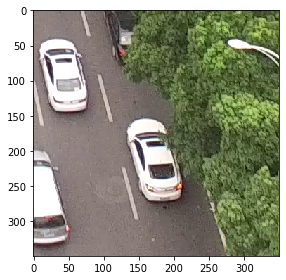

In [13]:
from skimage.io import imshow
# x = 980
# y = 2150
# w = 250
# h = 250

w = 350
h = 350
x = random.randrange(w, 2100-w)
y = random.randrange(h, 3800-h)
print(x, y)
x = 1684 
y = 2352
# x = 1048 
# y = 1373
# x = 400
# y = 1400

img = img_origin[x:x+w, y:y+h,:]
gt = gt_origin[x:x+w, y:y+h,:]
segments = spixel[x:x+w, y:y+h]
rgb_seg = new_array[x:x+w, y:y+h]
segments_ids = np.unique(segments)

# # # # centers
centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(segments_ids)
label_dict = dict(zip(list(segments_ids),list(labels)))
revers_label = {v:k for k,v in label_dict.items()}
node_color = dict()
for i in range(len(segments_ids)):
    node_color[i] = rgb_dict[revers_label[i]]/255
print(len(node_color))
cmaps = pd.Series(node_color)
label_gt_node = dict()
for i in range(len(segments_ids)):
    label_gt_node[i] = color_map[revers_label[i]]
gt_cmaps = pd.Series(label_gt_node)
new_seg = np.vectorize(label_dict.get)(segments)  # don't touch
imshow(img)

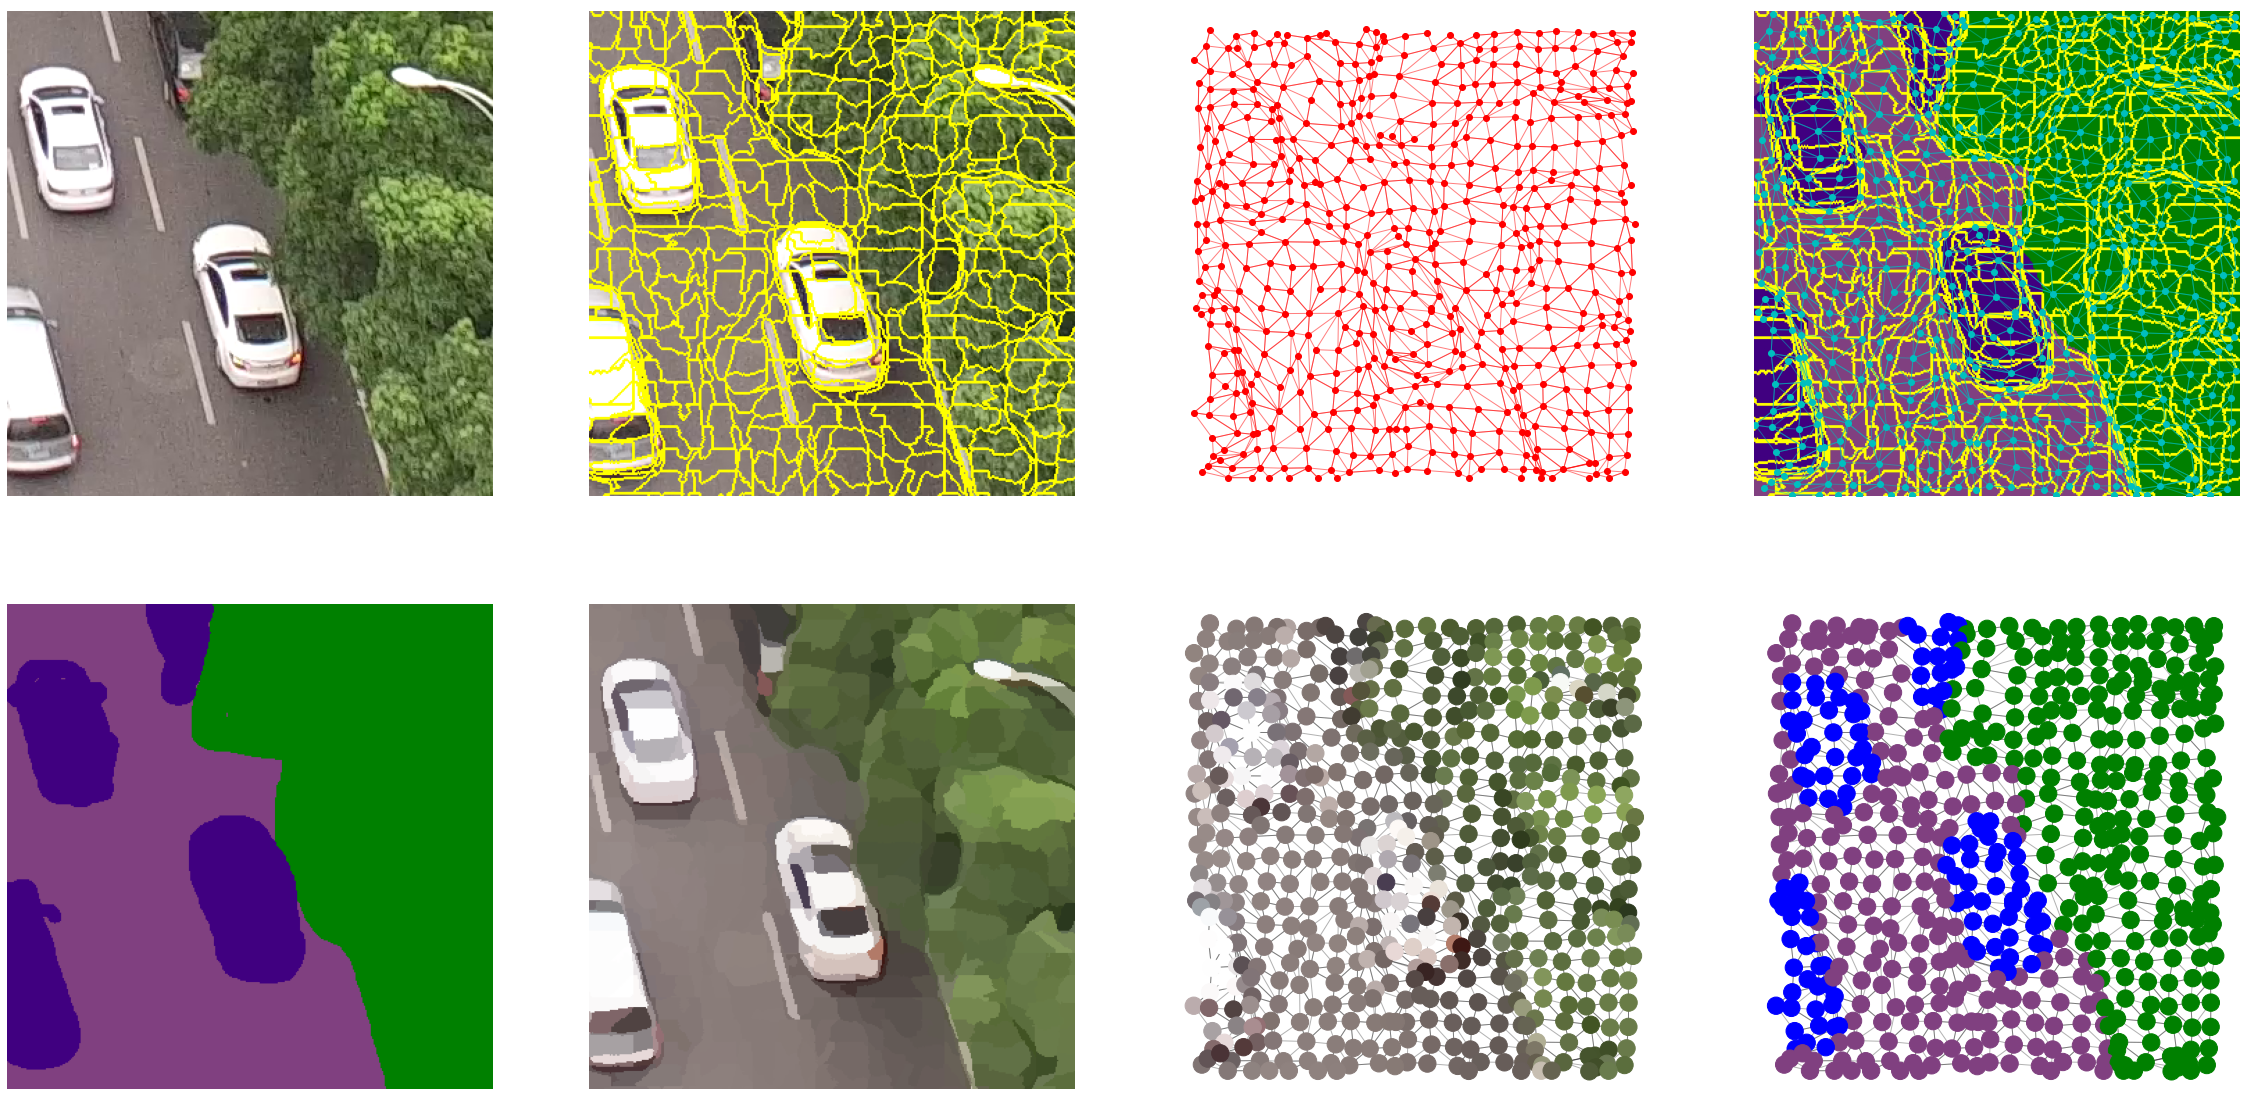

In [18]:
fig = plt.figure(figsize=(40,20))
row = 2
col = 4

ax0 = fig.add_subplot(row, col, 1)
ax1 = fig.add_subplot(row, col, 2)
ax2 = fig.add_subplot(row, col, 3)
ax3 = fig.add_subplot(row, col, 4)
ax4 = fig.add_subplot(row, col, 5)
ax5 = fig.add_subplot(row, col, 6)
ax6 = fig.add_subplot(row, col, 7)
ax7 = fig.add_subplot(row, col, 8)
ax0.imshow(img, cmap="gray")
ax1.imshow(mark_boundaries(img, segments), cmap="gray")
# ax2.imshow(mark_boundaries(img, segments), cmap="gray")
ax3.imshow(mark_boundaries(gt, segments), cmap="gray")
ax4.imshow(gt)
ax5.imshow(rgb_seg)

vs_right = np.vstack([new_seg[:,:-1].ravel(), new_seg[:,1:].ravel()])
vs_below = np.vstack([new_seg[:-1,:].ravel(), new_seg[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)
ax2.scatter(centers[:,1],centers[:,0], c='r')
ax3.scatter(centers[:,1],centers[:,0], c='c')


for i in range(bneighbors.shape[1]):

    y0,x0 = centers[bneighbors[0,i]]
    y1,x1 = centers[bneighbors[1,i]]
    
    l = Line2D([x0,x1],[y0,y1], c="r", alpha=0.5,linewidth =1)
    l2 = Line2D([x0,x1],[y0,y1], c="c", alpha=0.5,linewidth =1)
    l3 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    l4 = Line2D([x0,x1],[y0,y1], c="k", alpha=0.3,linewidth =1)
    ax2.add_line(l)
    ax3.add_line(l2)
    ax6.add_line(l3)
    ax7.add_line(l4)
ax6.scatter(centers[:,1],centers[:,0], c=cmaps, s= 300, alpha=1, zorder=502)    
ax7.scatter(centers[:,1],centers[:,0], c=gt_cmaps, s= 300, alpha=1, zorder=502)    
ax0.axis('off');ax1.axis('off');ax2.axis('off');ax3.axis('off');ax4.axis('off');ax5.axis('off');ax6.axis('off');ax7.axis('off')
ax6.invert_yaxis();ax7.invert_yaxis()
ax2.invert_yaxis()


# plt.show()
plt.savefig('superpixel_graph_1208.png',bbox_inches="tight")

In [23]:
a,b = np.unique(segments,return_counts=True)
b

array([ 19,  27, 116, 138, 192,  25, 118,  91,  24, 116,   7,  74, 133,
        84,  64,  93, 184, 109,  54,  65, 106,   5, 312, 220, 137, 350,
        57, 329, 513, 526, 268, 274, 221, 261, 100,  39, 341, 336, 160,
       277, 139, 117, 139, 251,  24, 341, 363, 448, 347, 587, 290, 395,
        93,  46, 312, 271, 113, 322, 272,  68,  21, 201, 208, 293, 243,
       124, 166, 510, 138,  68, 548, 157,  31, 266, 406, 198, 368,  35,
       448, 183, 250, 188, 157,  46, 145,  45,  46, 415,  49, 270, 139,
       237, 153, 521, 186, 106, 435, 134, 198, 154, 264, 108,  26, 177,
        81, 109, 412, 233, 192, 143,  81, 105,  42, 210, 128,  69, 795,
       151,  61, 182, 768, 193, 266, 201, 377, 254, 133, 219, 213,  51,
       140, 232, 244,  53, 387, 437, 110, 380, 142, 748, 107, 183, 507,
        69, 350,  60, 347, 242, 100, 660, 395, 722, 418, 343, 297,  11,
       163,  29, 201,  46, 337,  15, 115, 106, 147, 195, 117, 243, 155,
       423, 314, 679, 455,  58, 461, 510, 198,  48, 232, 206,  6

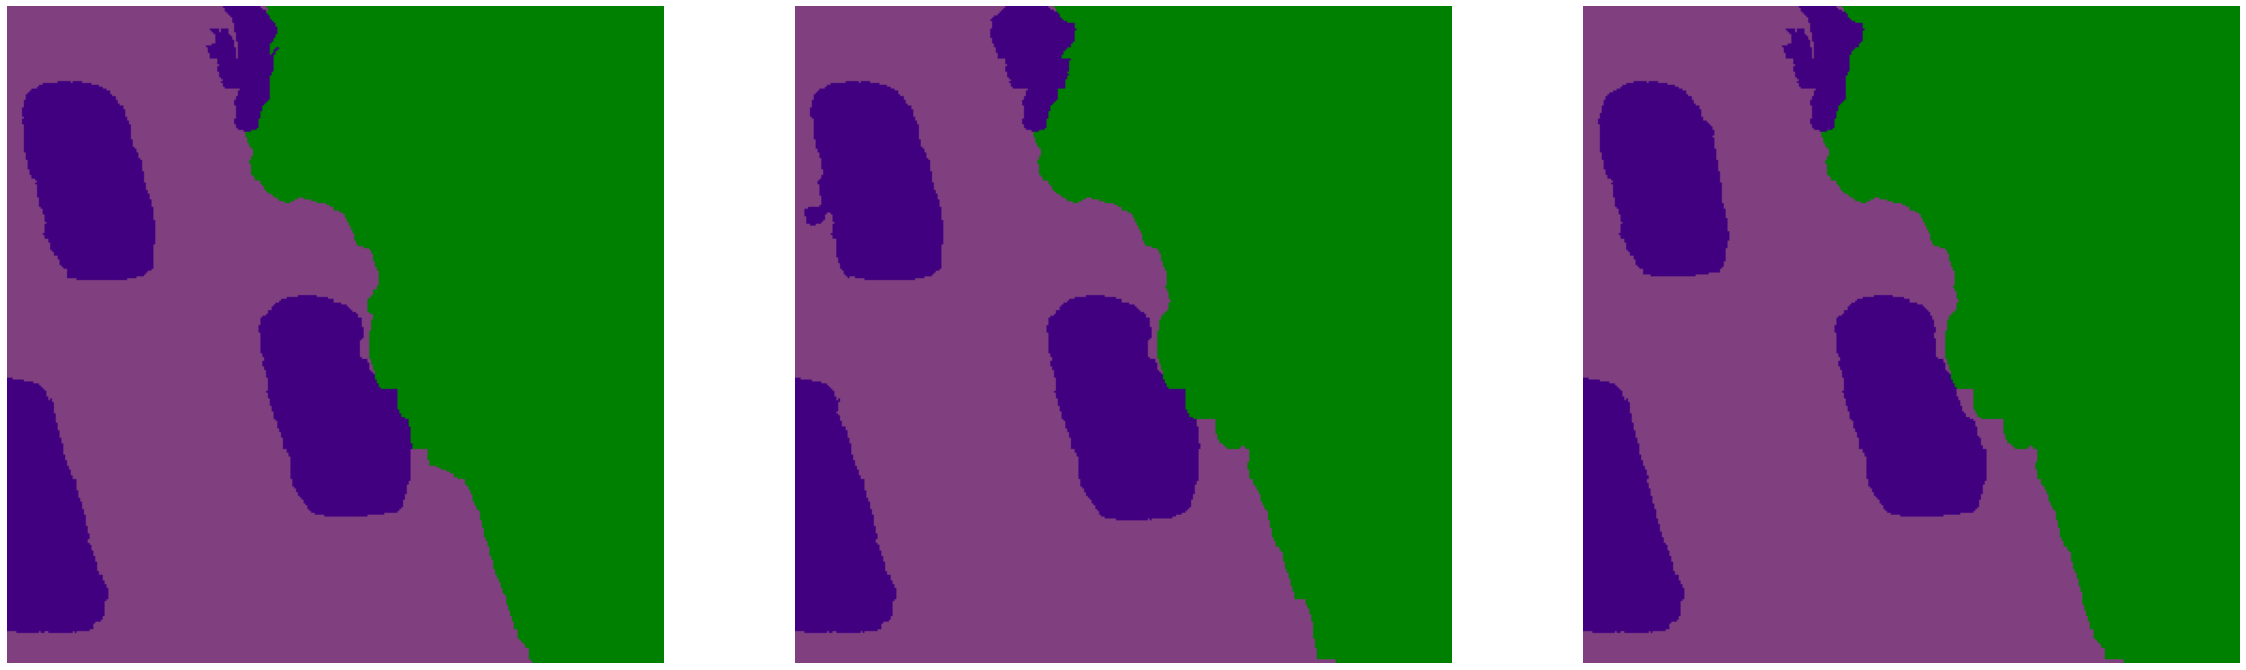

In [15]:

result_dir = '../SGNN/convert_test_set/'
train_id_list = [1638772586, 1638670040, 1638584591]
fig = plt.figure(figsize=(40,20))
row = 1
col = len(train_id_list)



for idx, train_id in enumerate(train_id_list):
    globals()['ax{}'.format(idx)]=fig.add_subplot(row,col,idx+1)
    train_dir = result_dir + 'pred_g2i_'+str(train_id)+'/'
    seq = first['image_path'].split('/')[4]
    img_num = first['image_path'].split('/')[-1]
    test_image = np.load(train_dir+seq+'_'+img_num.replace('png','npy'))
    clrEnc = UAVidColorTransformer()
    test_image = clrEnc.inverse_transform(test_image)
    # imshow(test_image[x:x+w, y:y+h,:])
    globals()[f'ax{idx}'].imshow(test_image[x:x+w, y:y+h,:])
    globals()[f'ax{idx}'].axis('off')
    

In [16]:
first_slic = slic_df[slic_df['gt_path']==first['gt_path']]
first_slic

image_path                       id  \
0  ../data/uavid/uavid_val/seq20/Images/000900.png  Images_uavid_val_000900   

                                  superpixel_segment  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                           gt_path  \
0  ../data/uavid/uavid_val/seq20/Labels/000900.png   

                                                   G  \
0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                             feature  \
0  [[255.0, 255.0, 255.0, 0.0018310547, 0.0034722...   

                                               edges  \
0  [[0, 1], [0, 336], [0, 0], [1, 2], [1, 337], [...   

                                            rgb_mean  \
0  [[255.0, 255.0, 255.0], [255.0, 255.0, 255.0],...   

                                            pos_mean  \
0  [[0.0018310546875, 0.0034722222222222238], [0....   

                                            label_gt  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

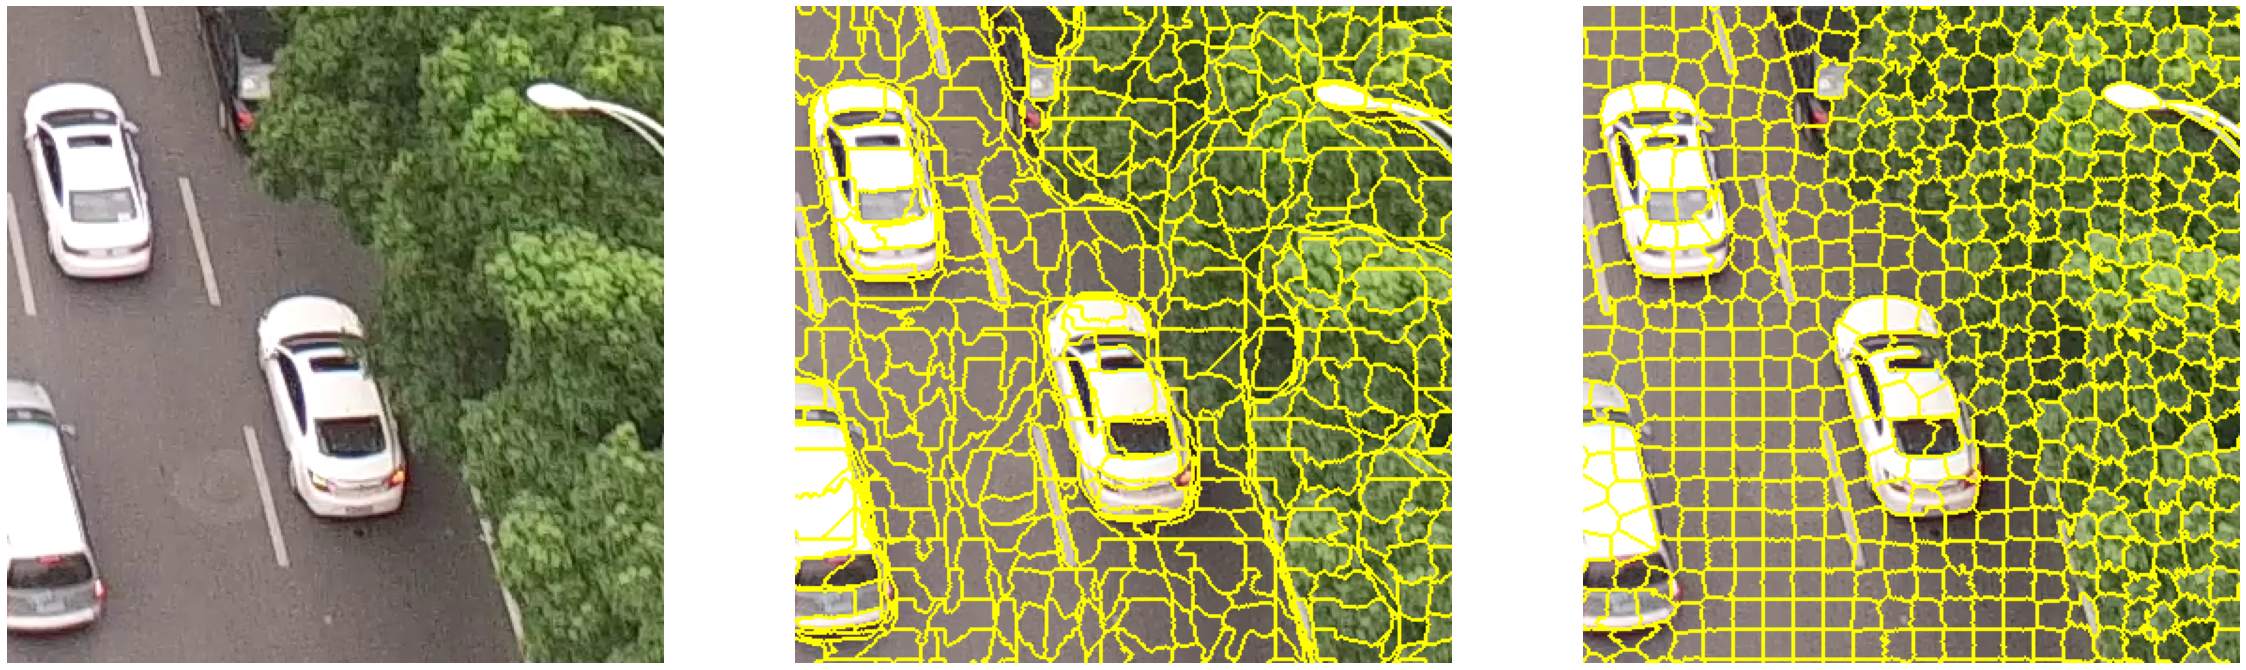

In [17]:

slic_segments = first_slic['superpixel_segment']

slic_segments= slic_segments[0][x:x+w, y:y+h]
fig = plt.figure(figsize=(40,20))
row = 1
col = 3

ax0 = fig.add_subplot(row, col, 1)
ax1 = fig.add_subplot(row, col, 2)
ax2 = fig.add_subplot(row, col, 3)
ax0.imshow(img, cmap="gray")
ax1.imshow(mark_boundaries(img, segments), cmap="gray")
ax2.imshow(mark_boundaries(img, slic_segments), cmap="gray")
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
# plt.show()
plt.savefig('superpixel_graph_slic.png',bbox_inches="tight")